## 1. Data Preprocessing
### 1.A) Analysing Data

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('/kaggle/input/seoul-weather/seoul_ex.csv')
print(df.columns)
df.head(10)

Index(['date', 'temp', 'humidity', 'windspeed', 'sealevelpressure',
       'moonphase'],
      dtype='object')


,date,temp,humidity,windspeed,sealevelpressure,moonphase
0,2018-01-01,28.8,49.6,6.5,1027.7,0.47
1,2018-01-02,28.6,50.7,10.2,1029.1,0.50
2,2018-01-03,24.7,42.4,10.3,1031.1,0.53
3,2018-01-04,22.7,47.5,6.0,1028.3,0.57
4,2018-01-05,26.1,53.3,9.1,1021.6,0.60
5,2018-01-06,26.3,52.3,6.1,1023.8,0.63
6,2018-01-07,28.6,53.2,4.3,1022.6,0.67
7,2018-01-08,34.8,53.2,14.8,1012.3,0.70
8,2018-01-09,26.2,58.7,14.0,1013.5,0.75
9,2018-01-10,19.7,57.3,18.1,1018.3,0.77


In [3]:
# Creating individual DataFrames for each column
temp_data = pd.DataFrame(df[['date', 'temp']].set_index('date'))
humidity_data = pd.DataFrame(df[['date', 'humidity']].set_index('date'))
windspeed_data = pd.DataFrame(df[['date', 'windspeed']].set_index('date'))
sealevelpressure_data = pd.DataFrame(df[['date', 'sealevelpressure']].set_index('date'))
moonphase_data = pd.DataFrame(df[['date', 'moonphase']].set_index('date'))
humidity_data

,humidity
date,
2018-01-01,49.6
2018-01-02,50.7
2018-01-03,42.4
2018-01-04,47.5
2018-01-05,53.3
...,...
2021-12-28,74.2
2021-12-29,73.5
2021-12-30,49.6


In [4]:
print(temp_data.isnull().sum())
temp_data.sample(10)

temp    0
dtype: int64


,temp
date,
2021-05-09,60.7
2018-12-08,18.0
2018-12-15,25.8
2021-12-04,34.3
2018-04-10,58.6
2019-02-14,29.9
2020-12-09,33.2
2019-08-28,78.9
2018-03-06,38.9


In [5]:
temp_data =temp_data['temp'].values
humidity_data =humidity_data['humidity'].values
windspeed_data =windspeed_data['windspeed'].values
sealevelpressure_data=sealevelpressure_data['sealevelpressure'].values
moonphase_data =moonphase_data['moonphase'].values
print(temp_data.shape)
temp_data[:10]

(1462,)


array([28.8, 28.6, 24.7, 22.7, 26.1, 26.3, 28.6, 34.8, 26.2, 19.7])

In [6]:
temp_data=temp_data.reshape(-1,1)
humidity_data=humidity_data.reshape(-1,1)
windspeed_data=windspeed_data.reshape(-1,1)
sealevelpressure_data=sealevelpressure_data.reshape(-1,1)
moonphase_data=moonphase_data.reshape(-1,1)

In [7]:
temp_data.shape
temp_data[:5]

array([[28.8],
       [28.6],
       [24.7],
       [22.7],
       [26.1]])

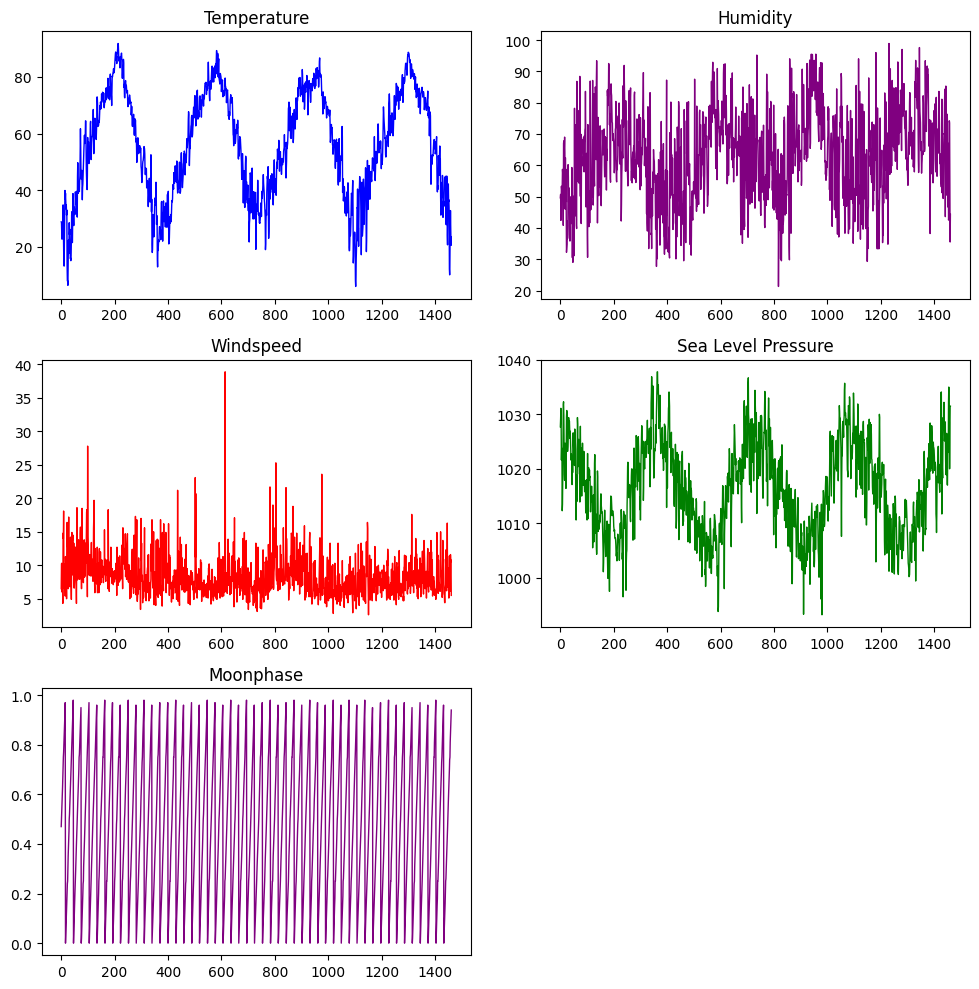

In [8]:

plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1) 
plt.plot(temp_data,linewidth =1, color='blue')
plt.title('Temperature')

plt.subplot(3, 2, 2)
plt.plot(humidity_data,linewidth =1 ,color='purple')
plt.title('Humidity')

plt.subplot(3, 2, 3)
plt.plot(windspeed_data,linewidth =1, color='red')
plt.title('Windspeed')

plt.subplot(3, 2, 4) 
plt.plot(sealevelpressure_data,linewidth =1, color='green')
plt.title('Sea Level Pressure')

plt.subplot(3, 2, 5)
plt.plot(moonphase_data,linewidth =1 ,color='purple')
plt.title('Moonphase')

plt.tight_layout()  # Adjusts spacing between plots
plt.show()


### 1.B) Scaling Data

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler1 =MinMaxScaler(feature_range =(0,2))
scaler2 =MinMaxScaler(feature_range =(0,2))
scaler3 =MinMaxScaler(feature_range =(0,2))
scaler4 =MinMaxScaler(feature_range =(0,2))
scaler5 =MinMaxScaler(feature_range =(0,2))
temp_scaled =scaler1.fit_transform(temp_data)
hum_scaled =scaler2.fit_transform(humidity_data)
wind_scaled =scaler3.fit_transform(windspeed_data)
sea_scaled =scaler4.fit_transform(sealevelpressure_data)
moon_scaled =scaler5.fit_transform(moonphase_data)

In [11]:
print(f"Scaled Data Size : {wind_scaled.shape}")
wind_scaled[:5]

Scaled Data Size : (1462, 1)


array([[0.21487603],
       [0.41873278],
       [0.42424242],
       [0.18732782],
       [0.35812672]])

In [12]:
# Creating sequential data and storing in inp and out
steps =13
inp_t=[]
out_t =[]
for i in range(len(temp_scaled)-steps):
    inp_t.append(temp_scaled[i:i+steps])
    out_t.append(temp_scaled[i+steps])
    
inp_h=[]
out_h =[]
for i in range(len(hum_scaled)-steps):
    inp_h.append(hum_scaled[i:i+steps])
    out_h.append(hum_scaled[i+steps])
    
inp_w=[]
out_w =[]
for i in range(len(wind_scaled)-steps):
    inp_w.append(wind_scaled[i:i+steps])
    out_w.append(wind_scaled[i+steps])
    
inp_s=[]
out_s =[]
for i in range(len(sea_scaled)-steps):
    inp_s.append(sea_scaled[i:i+steps])
    out_s.append(sea_scaled[i+steps])
    
inp_m=[]
out_m =[]
for i in range(len(moon_scaled)-steps):
    inp_m.append(moon_scaled[i:i+steps])
    out_m.append(moon_scaled[i+steps])

In [13]:
print(inp_s[:3])
print(out_s[:3])

[array([[1.5470852 ],
       [1.60986547],
       [1.69955157],
       [1.57399103],
       [1.2735426 ],
       [1.37219731],
       [1.31838565],
       [0.85650224],
       [0.9103139 ],
       [1.12556054],
       [1.48878924],
       [1.7309417 ],
       [1.75336323]]), array([[1.60986547],
       [1.69955157],
       [1.57399103],
       [1.2735426 ],
       [1.37219731],
       [1.31838565],
       [0.85650224],
       [0.9103139 ],
       [1.12556054],
       [1.48878924],
       [1.7309417 ],
       [1.75336323],
       [1.64125561]]), array([[1.69955157],
       [1.57399103],
       [1.2735426 ],
       [1.37219731],
       [1.31838565],
       [0.85650224],
       [0.9103139 ],
       [1.12556054],
       [1.48878924],
       [1.7309417 ],
       [1.75336323],
       [1.64125561],
       [1.37668161]])]
[array([1.64125561]), array([1.37668161]), array([1.15695067])]


In [14]:
# Reshape
import numpy as np
inp_t =np.asanyarray(inp_t)
out_t =np.asanyarray(out_t)

inp_h =np.asanyarray(inp_h)
out_h =np.asanyarray(out_h)

inp_w =np.asanyarray(inp_w)
out_w =np.asanyarray(out_w)

inp_s =np.asanyarray(inp_s)
out_s =np.asanyarray(out_s)

inp_m =np.asanyarray(inp_m)
out_m =np.asanyarray(out_m)
print(f"shape of inp : {inp_t.shape}")
print(f"shape of out : {out_t.shape}")

shape of inp : (1449, 13, 1)
shape of out : (1449, 1)


In [15]:
# 70% data for training and 30% data from testing
train_no =int(round(len(df)*0.8 ,0))
test_no =int(len(df) -round(len(df)*0.8 ,0))

print(f"no. of days of training : {train_no}")
print(f"no. of days of testing : {test_no}")

no. of days of training : 1170
no. of days of testing : 292


In [16]:
Xt_train =inp_t[:train_no,:]
Xt_test =inp_t[train_no:,:]
yt_train =out_t[:train_no]
yt_test =out_t[train_no:]

Xh_train =inp_h[:train_no,:]
Xh_test =inp_h[train_no:,:]
yh_train =out_h[:train_no]
yh_test =out_h[train_no:]

Xw_train =inp_w[:train_no,:]
Xw_test =inp_w[train_no:,:]
yw_train =out_w[:train_no]
yw_test =out_w[train_no:]

Xs_train =inp_s[:train_no,:]
Xs_test =inp_s[train_no:,:]
ys_train =out_s[:train_no]
ys_test =out_s[train_no:]

Xm_train =inp_m[:train_no,:]
Xm_test =inp_m[train_no:,:]
ym_train =out_m[:train_no]
ym_test =out_m[train_no:]

In [17]:
print(f"shape of input : {inp_s.shape}")
print(f"shape of output : {out_s.shape}")
print(f"shape of X_train : {Xs_train.shape}")
print(f"shape of X_test : {Xs_test.shape}")
print(f"shape of y_train : {ys_train.shape}")
print(f"shape of y_test : {ys_test.shape}")

shape of input : (1449, 13, 1)
shape of output : (1449, 1)
shape of X_train : (1170, 13, 1)
shape of X_test : (279, 13, 1)
shape of y_train : (1170, 1)
shape of y_test : (279, 1)


## 2. Model Building

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense ,RepeatVector,LSTM ,GRU ,Dropout, Bidirectional
from tensorflow.keras.layers import Flatten ,Conv1D ,MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error

In [19]:
## Defining the structure of the model
model =Sequential()
model.add(LSTM(50 ,return_sequences=True ,input_shape =(20,1)))
model.add(LSTM(50 ,return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss ='mean_squared_error' ,optimizer= 'adam')

model =Sequential()
model.add(LSTM(50 ,return_sequences=True ,input_shape =(20,1)))
model.add(LSTM(50 ,return_sequences =True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss ='mean_squared_error' ,optimizer ='adam')

ValueError: Input 0 of layer "gru" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 50)

In [ ]:
from copy import deepcopy
model1 =deepcopy(model)
model2 =deepcopy(model)
model3 =deepcopy(model)
model4 =deepcopy(model)
model5 =deepcopy(model)


In [ ]:
# # plt.rcParams['font.size'] = 14 
# plot_model (model ,to_file ='time_series_model.png' ,show_shapes =True,show_layer_names=True ,dpi=70)

In [ ]:
model.summary()

In [ ]:
#  Training Model
his_temp=model1.fit(Xt_train ,yt_train ,epochs =1000,verbose =1)

In [ ]:
his_hum=model2.fit(Xh_train ,yh_train ,epochs =1000,verbose =1)

In [ ]:
his_wind=model3.fit(Xw_train ,yw_train ,epochs =1000,verbose =1)

In [ ]:
his_sea=model4.fit(Xs_train ,ys_train ,epochs =1000,verbose =1)

In [ ]:
his_moon=model5.fit(Xm_train ,ym_train ,epochs =1000,verbose =1)

In [ ]:
model1.save_weights("Temperature_model.weights.h5")  
model2.save_weights("Humidity_model.weights.h5")  
model3.save_weights("Windspeed_model.weights.h5")  
model4.save_weights("Sea_model.weights.h5")  
model5.save_weights("Moonphase_model.weights.h5")  

In [ ]:
#  Evaluation of model
print(f"temp Predicted Value : {model1.predict(Xt_train)[8][0]}")
print(f"temp expected value : {yt_train[8][0]}")

print(f"humidity Predicted Value : {model2.predict(Xh_train)[8][0]}")
print(f"humidity expected value : {yh_train[8][0]}")

print(f"windspeed Predicted Value : {model3.predict(Xw_train)[8][0]}")
print(f"windspeed expected value : {yw_train[8][0]}")

print(f"sealevel Predicted Value : {model4.predict(Xs_train)[8][0]}")
print(f"sealevel expected value : {ys_train[8][0]}")

print(f"moonphase Predicted Value : {model5.predict(Xm_train)[8][0]}")
print(f"moonphase expected value : {ym_train[8][0]}")

In [ ]:
pred_t =model1.predict(Xt_test)
pred_h =model2.predict(Xh_test)
pred_w =model3.predict(Xw_test)
pred_s =model4.predict(Xs_test)
pred_m =model5.predict(Xm_test)
print(f"Printed value : {pred_h[250][0]}")
print(f"expected value : {yh_test[250][0]}")

In [ ]:
t_test_unscaled=scaler1.inverse_transform(yt_test)
h_test_unscaled=scaler2.inverse_transform(yh_test)
w_test_unscaled=scaler3.inverse_transform(ys_test)
s_test_unscaled=scaler4.inverse_transform(yw_test)
m_test_unscaled=scaler5.inverse_transform(ym_test)
t_test_unscaled

In [ ]:
t_pred_unscaled=scaler1.inverse_transform(pred_t)
h_pred_unscaled=scaler2.inverse_transform(pred_h)
w_pred_unscaled=scaler3.inverse_transform(pred_w)
s_pred_unscaled=scaler4.inverse_transform(pred_s)
m_pred_unscaled=scaler5.inverse_transform(pred_m)
t_pred_unscaled

In [ ]:
mse_t = mean_squared_error(t_test_unscaled, t_pred_unscaled)
print("Mean Squared Error of Temperature:", mse_t)
mse_h = mean_squared_error(h_test_unscaled, h_pred_unscaled)
print("Mean Squared Error of Humidity:", mse_h)
mse_w = mean_squared_error(w_test_unscaled, w_pred_unscaled)
print("Mean Squared Error of Windspeed:", mse_w)
mse_s = mean_squared_error(s_test_unscaled, s_pred_unscaled)
print("Mean Squared Error of SeaLevelPressure:", mse_s)
mse_m = mean_squared_error(m_test_unscaled, m_pred_unscaled)
print("Mean Squared Error of Moonphase:", mse_m)

In [ ]:
print(pred_h.shape)
print(yh_test.shape)

In [ ]:
pred_dt=pd.DataFrame(pred_t)
pred_dt['True_temp'] =yt_test
pred_dt =pred_dt.rename(columns ={0 :'Predicted_temp'})

pred_dh=pd.DataFrame(pred_h)
pred_dh['True_hum'] =yh_test
pred_dh =pred_dh.rename(columns ={0 :'Predicted_hum'})

pred_dw=pd.DataFrame(pred_w)
pred_dw['True_wind'] =yw_test
pred_dw =pred_dw.rename(columns ={0 :'Predicted_wind'})

pred_ds=pd.DataFrame(pred_s)
pred_ds['True_sea'] =ys_test
pred_ds =pred_ds.rename(columns ={0 :'Predicted_sea'})

pred_dm=pd.DataFrame(pred_m)
pred_dm['True_moon'] =ym_test
pred_dm =pred_dm.rename(columns ={0 :'Predicted_moon'})
pred_dw

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1) 
sns.lineplot(data=pred_t, x=pred_t.index, y='True_Temp', label='True_Temp')
sns.lineplot(data=pred_t, x=pred_t.index, y='Predicted_Temp', label='Predicted_Temp')
plt.title('Temperature')

plt.subplot(3, 2, 2)
sns.lineplot(data=pred_t, x=pred_t.index, y='True_hum', label='True_hum')
sns.lineplot(data=pred_t, x=pred_t.index, y='True_hum', label='Predicted_hum')
plt.title('Humidity')

plt.subplot(3, 2, 3)
sns.lineplot(data=pred_w, x=pred_w.index, y='True_wind', label='True_wind')
sns.lineplot(data=pred_w, x=pred_w.index, y='Predicted_wind', label='Predicted_wind')
plt.title('Windspeed')

plt.subplot(3, 2, 4) 
sns.lineplot(data=pred_s, x=pred_s.index, y='True_sea', label='True_sea')
sns.lineplot(data=pred_s, x=pred_s.index, y='Predicted_sea', label='Predicted_sea')
plt.title('Sea Level Pressure')

plt.subplot(3, 2, 5)
sns.lineplot(data=pred_m, x=pred_m.index, y='True_moon', label='True_moon')
sns.lineplot(data=pred_m, x=pred_m.index, y='Predicted_moon', label='Predicted_moon')
plt.title('Moonphase')

plt.tight_layout()  # Adjusts spacing between plots
plt.show()

# plt.figure(figsize =(12,8))
# sns.lineplot(data=pred_df, x=pred_df.index, y='True_Temp', label='True_Temp')
# sns.lineplot(data=pred_df, x=pred_df.index, y='Predicted_Temp', label='Predicted_Temp')
# plt.title("Prediction V/S True values on Testing Set")

In [ ]:
temp_scaled.shape

In [ ]:
x_input=temp_scaled[:20]

In [ ]:
x_input.shape

In [ ]:
# now reshaping the data
x_input = x_input.reshape(1, -1)
x_input.shape

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
## creatitng a functions which returns the next 30 days prediction
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new = np.arange(1,1463)
day_pred = np.arange(1463,1493)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(day_new,moon_scaled)
plt.plot(day_pred,lst_output)

In [ ]:
df3 = temp_scaled.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)